# 2-2. EDA

## 1. DB -> Pandas

In [1]:
import sqlite3

In [2]:
# DB 접속
conn = sqlite3.connect("../data/boston.db")

# 커서 초기화
cur = conn.cursor()
# 검색 정의 (쿼리 문)
cur.execute("SELECT * FROM boston LIMIT 5;")

In [3]:
# 데이터 가져오기
data = cur.fetchall()
print(data)

[(0, 0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98, 24.0), (1, 0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6), (2, 0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7), (3, 0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4), (4, 0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2)]


In [4]:
import pandas as pd

In [6]:
df = pd.read_sql_query("SELECT * FROM boston;", conn)

df.shape

(506, 15)

In [7]:
df.head()

,record,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2. Own CheckList

#### 1. 문제 정의 및 이해
- 제목
- 문제 유형: 회귀 / 이진 분류 / 다중 분류 / 기타: 
- 평가지표:

#### 2. EDA
- 데이터 파악
  - 파일별 용도 파악
  - 데이터 양 (레코드 수, 피처 수, 전체 용량 등)
  - 피처 이해 (이름, 의미, 타입, 결측치 여부, 고유값 등)
  - Train / Test 차이
  - Target (Label)
- 시각화
  - 수치형 데이터
    - 히스토그램
    - KDE
    - 분포도
    - 러그
  - 범주형 데이터
    - 막대
    - 포인트
    - 박스
    - 바이올린
    - 카운트
  - 관계
    - 히트맵
    - 라인
    - 산점도 (+회귀선)
- 피처 파악
  - 추가:
  - 삭제:
  - 인코딩:
- 이상치 파악

#### 3. 성능 개선
- 피처 엔지니어링
  - 이상치 제거
  - 스케일링 / 다운캐스팅
  - 결측값 처리
  - 인코딩
  - 타입 변경
  - 파생/조합 생성
- 하이퍼파라미터 최적화
- 데이터 증강

## 3. [Kaggle] Spaceship Titanic EDA

[이전 자료](https://github.com/nuyhc/Begins_with_a_single_step/blob/main/03_Pandas%26%EC%8B%9C%EA%B0%81%ED%99%94/homework/%EC%8A%A4%ED%8E%98%EC%9D%B4%EC%8A%A4%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89EDA_%EC%98%88%EC%8B%9C.ipynb) 중 일부

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import random
import glob

import warnings
warnings.filterwarnings("ignore")

In [9]:
# Data Load
train = pd.read_csv("../data/Spaceship_Titanic_train.csv")

train.shape

(8693, 14)

In [10]:
# 데이터 확인
display(train.head())
display(train.tail())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


- PassengerID: ggg-pp 포멧, ggg는 함께 여행하는 그룹, pp는 그룹내의 번호
- HomePlanet: 출발 행성
- CryoSleep: 극저온 수면 여부, 극저온 수면 중인 경우 객실에 있음
- Cabin: deck/num/side 포멧, 객실 번호
- side: P=Port, S=Starboard
- Destination: 도착지
- Age
- VIP
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: 편의시설 이용 여부 (요금 청구 내역)
- Name
- Transported: 다른 차원으로 이송되었는지 여부 (목표 값)

In [11]:
# 기본 정보 및 통계치 확인
display(train.info())
display(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


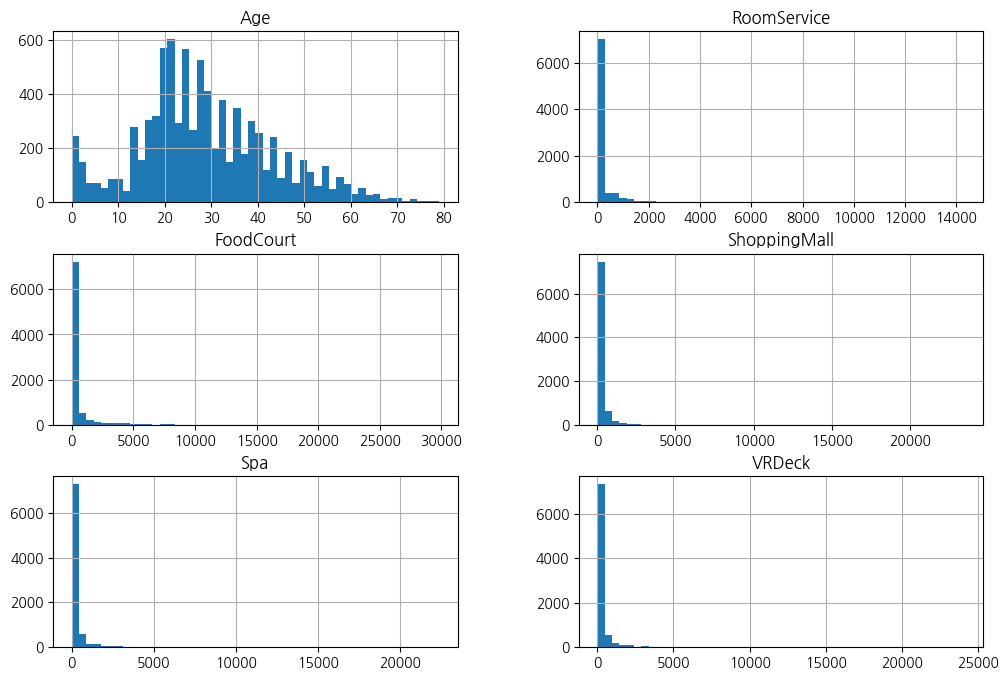

In [13]:
train.hist(bins=50, figsize=(12, 8));

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


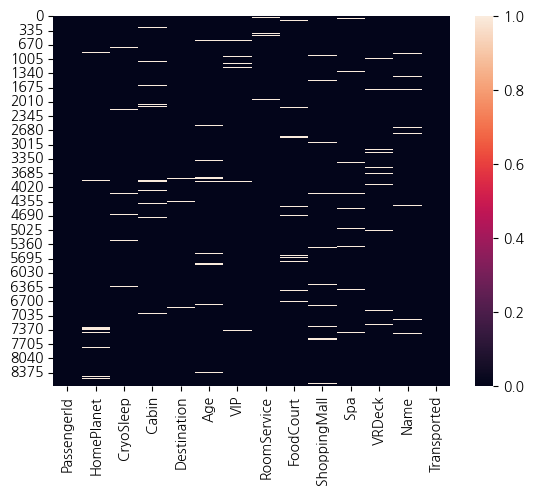

In [ ]:
# 결측치 확인
print(train.isnull().sum())
sns.heatmap(train.isnull());

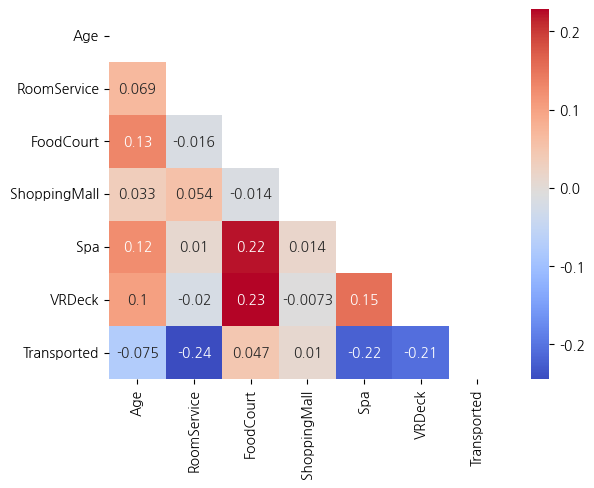

In [17]:
# 상관 관계
sns.heatmap(train.corr(), cmap="coolwarm", annot=True, mask=np.triu(np.ones_like(train.corr())));